In [1]:
import numpy as np
from main import HopfieldNetwork
import matplotlib.pyplot as plt
import random

In [2]:
def plot_capacity(sorted_N, means, sterrs, title, xlabel, ylabel):
    plt.style.use('seaborn-v0_8-darkgrid')

    plt.figure(figsize=(8, 5))
    plt.errorbar(
        sorted_N,
        means,
        yerr=sterrs,
        marker='o',
        linestyle='-',
        linewidth=2,
        markersize=6,
        color='tab:blue',
        capsize=4,
        label='Capacity ± StdErr'
    )

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [3]:
def plot_basin_of_attraction(P_values, nflips_range, fractions_retrieved, errors,N):
    plt.style.use('seaborn-v0_8-darkgrid')

    plt.figure(figsize=(10, 6))
    for P in P_values:
        plt.errorbar(
            nflips_range / N,
            fractions_retrieved[P],
            yerr=errors[P],
            label=fr"$P = {P}$",
            capsize=4,
            marker='o',
            linestyle='-',
            linewidth=2,
            markersize=6
        )

    plt.xlabel(r"Flipped fraction $(n_{\mathrm{flip}} / N)$", fontsize=12)
    plt.ylabel("Fraction of patterns correctly retrieved", fontsize=12)
    plt.title("Basin of Attraction vs Noise Level for Different $P$", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), fontsize=10)
    plt.tight_layout()
    plt.show()

In [4]:
def plot_raster(states_per_t):

    T, N = states_per_t.shape

    plt.figure(figsize=(10, 6))

    for neuron in range(N):
        spike_times = np.where(states_per_t[:, neuron] == 1)[0]
        plt.vlines(spike_times, neuron + 0.5, neuron + 1.5, color='black', linewidth=1)

    plt.xlabel("Time step")
    plt.ylabel("Unit index")
    plt.title(f"Spike Raster Plot for N={N} over time T={T}")

    # Make ticks readable
    plt.yticks(range(1, N + 1, max(1, N // 20)))  # adjust density of unit labels
    plt.xticks(range(0, T + 1, max(1, 1)))  # adjust density of time labels

    plt.ylim(0.5, N + 0.5)
    plt.tight_layout()
    plt.show()

In [5]:
def plot_overlaps(overlaps, T, with_legend=True, title=None):
    plt.figure(figsize=(10, 6))
    for mu in range(overlaps.shape[1]):
        plt.plot(overlaps[:, mu], label=f"$m^{{{mu+1}}}(t)$")  # exponent notation using LaTeX

    plt.xlabel("Time step t")
    plt.ylabel(r"Overlap $m^\mu(t)$")  # y-axis label with LaTeX math

    if title:
        plt.title(title)
    else:
        plt.title("Overlap between state and stored patterns over time")

    plt.xticks(range(0, T + 1))  # ticks every 10 steps
    plt.xlim(0, T)

    if with_legend:
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


# Ex 1. Storage capacity in the standard Hopfield network

## 1.1

In [6]:
P = 5
N = 300
T = 5

network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern
start_state = network.patterns[0].copy()
network.set_states(start_state)

network.compute_overlap()

[np.float64(1.0),
 np.float64(0.013333333333333334),
 np.float64(-0.06666666666666667),
 np.float64(0.10666666666666667),
 np.float64(-0.09333333333333334)]

In [7]:
overlaps = np.zeros((T+1,P))
print("Overlap with patterns at the initial state")
print(network.overlaps)
overlaps[0,:] = network.overlaps
for step in range(T):
    new_state = network.compute_next_state_fast()
    overlaps[step+1, :] = network.overlaps

overlaps

Overlap with patterns at the initial state
[np.float64(1.0), np.float64(0.013333333333333334), np.float64(-0.06666666666666667), np.float64(0.10666666666666667), np.float64(-0.09333333333333334)]


array([[ 1.        ,  0.01333333, -0.06666667,  0.10666667, -0.09333333],
       [ 1.        ,  0.01333333, -0.06666667,  0.10666667, -0.09333333],
       [ 1.        ,  0.01333333, -0.06666667,  0.10666667, -0.09333333],
       [ 1.        ,  0.01333333, -0.06666667,  0.10666667, -0.09333333],
       [ 1.        ,  0.01333333, -0.06666667,  0.10666667, -0.09333333],
       [ 1.        ,  0.01333333, -0.06666667,  0.10666667, -0.09333333]])

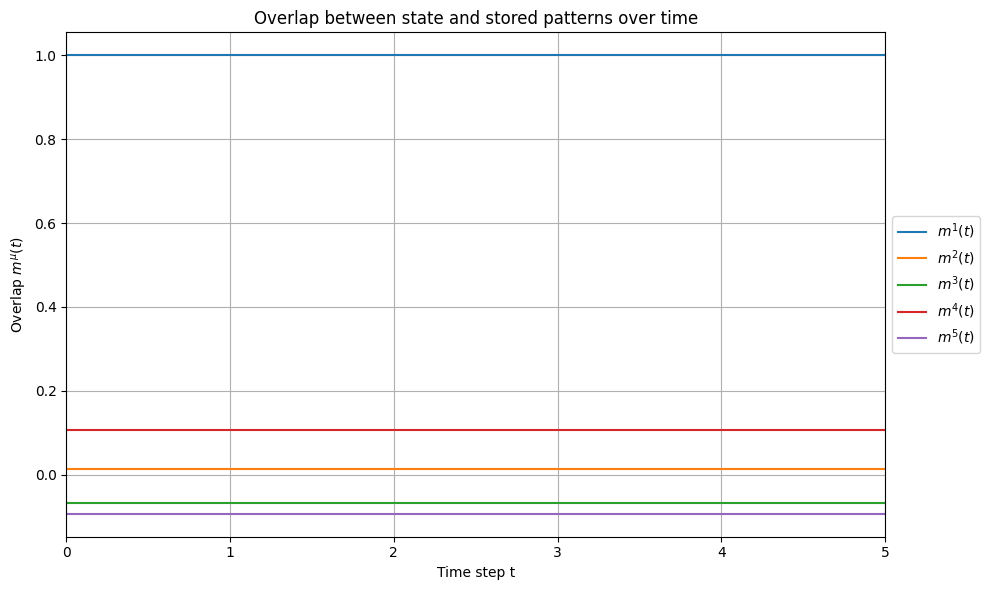

In [8]:
plot_overlaps(overlaps, T)

## 1.2

In [9]:
P = 200
N = 300
T = 5

network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern
start_state = network.patterns[0].copy()
network.set_states(start_state)

network.compute_overlap(return_none=True)

In [10]:
overlaps = np.zeros((T+1,P))
overlaps[0,:] = network.overlaps
for step in range(T):
    new_state = network.compute_next_state_fast()
    overlaps[step+1, :] = network.overlaps

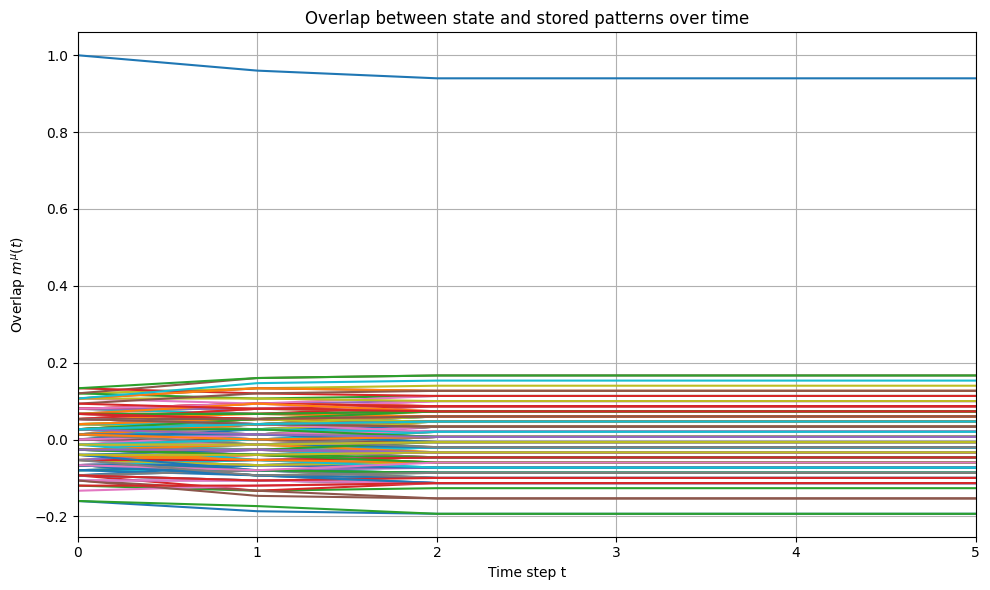

In [11]:
plot_overlaps(overlaps, T, with_legend=False)


### 1.3 
Plot the overlap with all patterns over the time step t. Why does
the overlap m1(t) increase to 1 across time?

In [12]:
P = 20
N = 600
T = 30
N_flipped = 200

network = HopfieldNetwork(N,P)
# Setting inital state as the first pattern with 200 bits flipped
start_state = network.patterns[0].copy()
random_index = random.sample(range(600), N_flipped)
start_state[random_index] *= -1

network.set_states(start_state)

network.compute_overlap(return_none=True)

In [13]:
overlaps = np.zeros((T+1,P))
overlaps[0,:] = network.overlaps
for step in range(T):
    new_state = network.compute_next_state_fast()
    overlaps[step+1, :] = network.overlaps

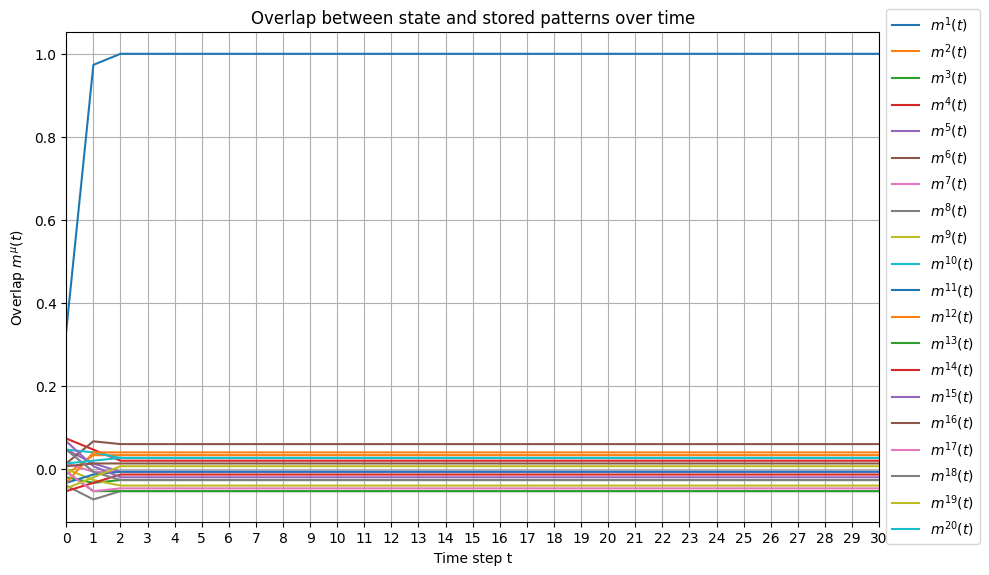

In [14]:
plot_overlaps(overlaps, T)


## 1.4 

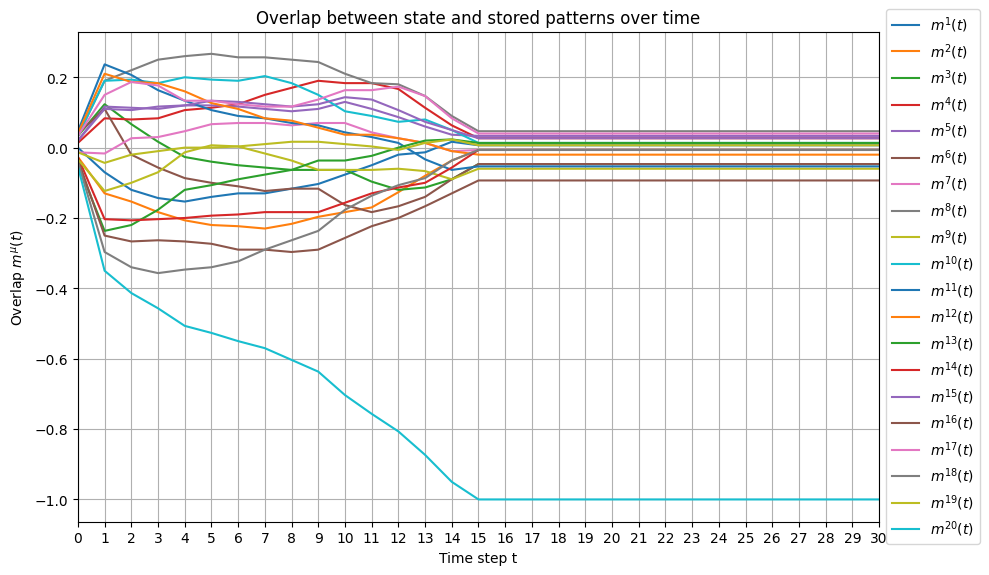

In [15]:
P = 20
N = 600
T = 30
N_flipped = 300

network = HopfieldNetwork(N,P)
# Setting inital state as the first pattern with 300 bits flipped
start_state = network.patterns[0].copy()
random_index = random.sample(range(600), N_flipped)
start_state[random_index] *= -1

network.set_states(start_state)

network.compute_overlap(return_none=True)

overlaps = np.zeros((T+1,P))
overlaps[0,:] = network.overlaps
for step in range(T):
    new_state = network.compute_next_state_fast()
    overlaps[step+1, :] = network.overlaps

plot_overlaps(overlaps, T)


### 1.5
The size of the 'basin of attraction'

In [16]:
N = 600  # Number of neurons
T = 30   # Number of update steps
P_values = [20, 40, 60]  # Number of patterns
nflips_range = np.arange(0, 301, 30)
repeats = 5  # Repeat for averaging

In [17]:
# fractions retrieved is keyed by P, each value being a list across N_flipped
fractions_retrieved = {P: [] for P in P_values}
errors = {P: [] for P in P_values}

for P in P_values:
    for N_flipped in nflips_range:
        success_counts = []
        for _ in range(repeats):
            network = HopfieldNetwork(N, P)
            success_count = 0
            for mu in range(P):

                start_state = network.patterns[mu].copy()
                flip_indices = random.sample(range(N), N_flipped)
                start_state[flip_indices] *= -1
                network.set_states(start_state)
                network.compute_overlap(return_none=True)

                for step in range(T):
                    network.compute_next_state_fast()
                final_state = network.states
                if np.array_equal(final_state, network.patterns[mu]):
                    success_count += 1

            success_fraction = success_count / P
            success_counts.append(success_fraction)

        mean = np.mean(success_counts)
        stderr = np.std(success_counts) / np.sqrt(repeats)
        fractions_retrieved[P].append(mean)
        errors[P].append(stderr)
        print(f"P={P}, N_flipped={N_flipped}, Success Fraction: {mean:.3f} ± {stderr:.3f}")

P=20, N_flipped=0, Success Fraction: 1.000 ± 0.000
P=20, N_flipped=30, Success Fraction: 1.000 ± 0.000
P=20, N_flipped=60, Success Fraction: 1.000 ± 0.000
P=20, N_flipped=90, Success Fraction: 1.000 ± 0.000
P=20, N_flipped=120, Success Fraction: 1.000 ± 0.000
P=20, N_flipped=150, Success Fraction: 1.000 ± 0.000
P=20, N_flipped=180, Success Fraction: 1.000 ± 0.000
P=20, N_flipped=210, Success Fraction: 1.000 ± 0.000
P=20, N_flipped=240, Success Fraction: 0.990 ± 0.009
P=20, N_flipped=270, Success Fraction: 0.300 ± 0.024
P=20, N_flipped=300, Success Fraction: 0.000 ± 0.000
P=40, N_flipped=0, Success Fraction: 0.995 ± 0.004
P=40, N_flipped=30, Success Fraction: 0.975 ± 0.012
P=40, N_flipped=60, Success Fraction: 0.960 ± 0.019
P=40, N_flipped=90, Success Fraction: 0.940 ± 0.011
P=40, N_flipped=120, Success Fraction: 0.930 ± 0.011
P=40, N_flipped=150, Success Fraction: 0.955 ± 0.008
P=40, N_flipped=180, Success Fraction: 0.930 ± 0.022
P=40, N_flipped=210, Success Fraction: 0.850 ± 0.029
P=4

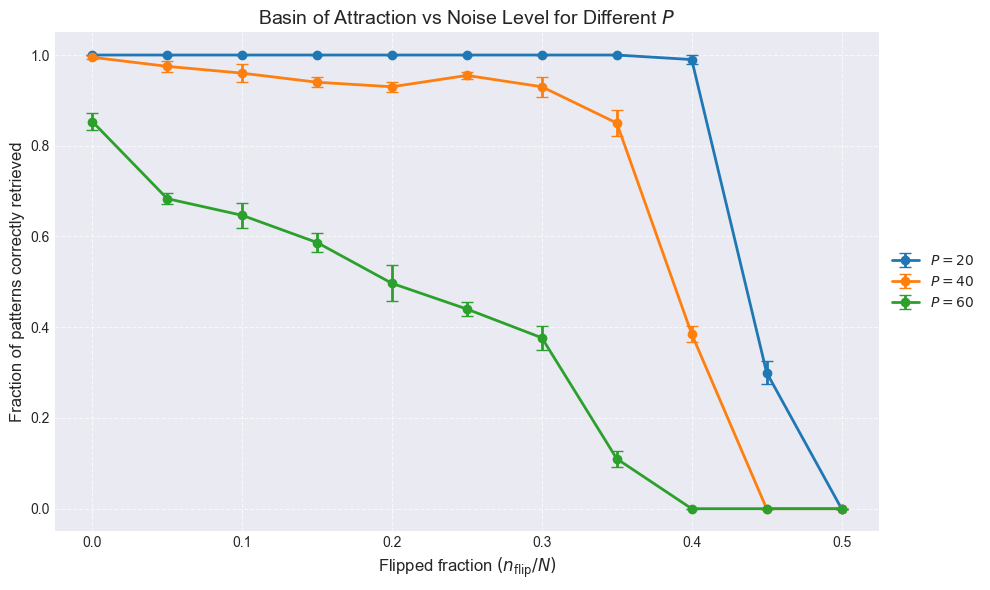

In [18]:
plot_basin_of_attraction(P_values, nflips_range, fractions_retrieved, errors, N)

## 1.6 

In [19]:
N_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
repeats = 5  # Repeat for averaging
max_P = {N: [] for N in N_values}

In [20]:
for n in N_values:
    for r in range(repeats):
        P = 0
        while True:
            P += 1
            network = HopfieldNetwork(n, P)
            all_recalled = True

            for p in range(P):
                network.set_states(network.patterns[p].copy())
                network.compute_overlap()
                new_state = network.compute_next_state_fast()

                if not np.array_equal(new_state, network.patterns[p]):
                    all_recalled = False
                    break

            if not all_recalled:
                max_P[n].append(P - 1)
                print(f"Repeat {r}, N={n}, P_max={P-1}")
                break


Repeat 0, N=100, P_max=11
Repeat 1, N=100, P_max=12
Repeat 2, N=100, P_max=11
Repeat 3, N=100, P_max=11
Repeat 4, N=100, P_max=11
Repeat 0, N=200, P_max=16
Repeat 1, N=200, P_max=19
Repeat 2, N=200, P_max=20
Repeat 3, N=200, P_max=15
Repeat 4, N=200, P_max=17
Repeat 0, N=300, P_max=23
Repeat 1, N=300, P_max=28
Repeat 2, N=300, P_max=24
Repeat 3, N=300, P_max=24
Repeat 4, N=300, P_max=25
Repeat 0, N=400, P_max=29
Repeat 1, N=400, P_max=23
Repeat 2, N=400, P_max=25
Repeat 3, N=400, P_max=24
Repeat 4, N=400, P_max=30
Repeat 0, N=500, P_max=29
Repeat 1, N=500, P_max=28
Repeat 2, N=500, P_max=31
Repeat 3, N=500, P_max=27
Repeat 4, N=500, P_max=37
Repeat 0, N=600, P_max=32
Repeat 1, N=600, P_max=35
Repeat 2, N=600, P_max=36
Repeat 3, N=600, P_max=34
Repeat 4, N=600, P_max=34
Repeat 0, N=700, P_max=39
Repeat 1, N=700, P_max=40
Repeat 2, N=700, P_max=43
Repeat 3, N=700, P_max=41
Repeat 4, N=700, P_max=46
Repeat 0, N=800, P_max=47
Repeat 1, N=800, P_max=52
Repeat 2, N=800, P_max=48
Repeat 3, N=

In [21]:
capacity_means = {N:np.mean(fractions)/N for N,fractions in max_P.items()}
capacity_sterrs = {N:np.std([f/N for f in fractions]) for N,fractions in max_P.items()}

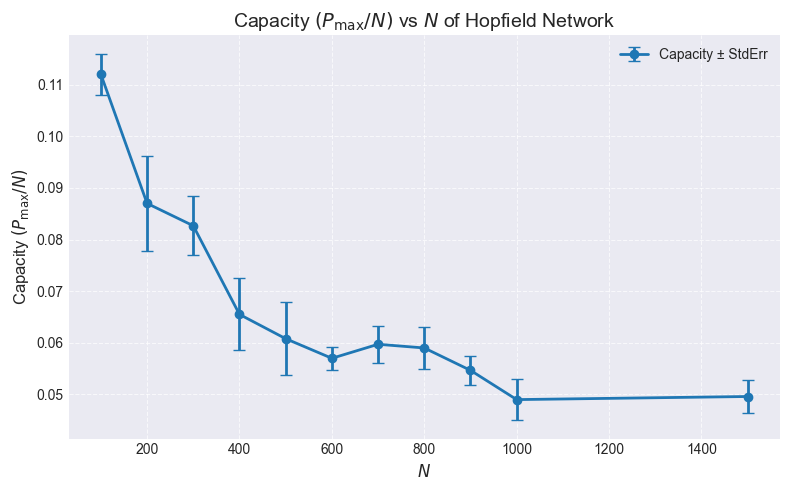

In [23]:
sorted_N = sorted(capacity_means.keys())
means = [capacity_means[N] for N in sorted_N]
sterrs = [capacity_sterrs[N] for N in sorted_N]
title = r'Capacity $(P_{\mathrm{max}}/N)$ vs $N$ of Hopfield Network'
xlabel = r'$N$'
ylabel = r'Capacity $(P_{\mathrm{max}}/N)$'
plot_capacity(sorted_N, means, sterrs, title, xlabel, ylabel)

### 1.7 (Bonus)

In [ ]:
N_values = [5000, 10_000, 50_000]
repeats = 3
max_alpha = 0.25  # upper bound for search

max_P = {N: [] for N in N_values}
for n in N_values:
    for r in range(repeats):
        P = 0
        retrieve = True
        while retrieve:
            # increment P, 
            P += 1
            for p in range(P):
                network = HopfieldNetwork(n,P)
                network.set_states(network.patterns[p].copy())
                network.compute_overlap()
            
                new_state = network.compute_next_state_fast()
                if network.overlaps[p] != 1:
                    # overlap between pattern and state no longer 1
                    retrieve = False
        print(f"completed repeat {r}, N {n}")
        max_P[n].append(p-1)


# Part 2

### 2.1

See main.py for implementation

In [24]:
N = 100
P = 5
K = N/2

network = HopfieldNetwork(N,P,K)

### 2.2

In [25]:
N_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
repeats = 5  # Repeat for averaging

max_P_ex2 = {N: [] for N in N_values}
for n in N_values:
    for r in range(repeats):
        P = 0
        while True:
            P += 1
            network = HopfieldNetwork(n, P, int(n/2))
            all_recalled = True

            for p in range(P):
                network.set_states(network.patterns[p].copy())
                network.compute_overlap()
                new_state = network.compute_next_state_sparse()

                if not np.array_equal(new_state, network.patterns[p]):
                    all_recalled = False
                    break

            if not all_recalled:
                max_P_ex2[n].append(P - 1)
                print(f"Repeat {r}, N={n}, P_max={P-1}")
                break


Repeat 0, N=100, P_max=6
Repeat 1, N=100, P_max=5
Repeat 2, N=100, P_max=5
Repeat 3, N=100, P_max=4
Repeat 4, N=100, P_max=6
Repeat 0, N=200, P_max=7
Repeat 1, N=200, P_max=8
Repeat 2, N=200, P_max=8
Repeat 3, N=200, P_max=8
Repeat 4, N=200, P_max=10
Repeat 0, N=300, P_max=11
Repeat 1, N=300, P_max=12
Repeat 2, N=300, P_max=13
Repeat 3, N=300, P_max=14
Repeat 4, N=300, P_max=13
Repeat 0, N=400, P_max=11
Repeat 1, N=400, P_max=15
Repeat 2, N=400, P_max=15
Repeat 3, N=400, P_max=14
Repeat 4, N=400, P_max=14
Repeat 0, N=500, P_max=15
Repeat 1, N=500, P_max=11
Repeat 2, N=500, P_max=17
Repeat 3, N=500, P_max=14
Repeat 4, N=500, P_max=17
Repeat 0, N=600, P_max=18
Repeat 1, N=600, P_max=19
Repeat 2, N=600, P_max=22
Repeat 3, N=600, P_max=22
Repeat 4, N=600, P_max=20
Repeat 0, N=700, P_max=25
Repeat 1, N=700, P_max=19
Repeat 2, N=700, P_max=22
Repeat 3, N=700, P_max=20
Repeat 4, N=700, P_max=22
Repeat 0, N=800, P_max=25
Repeat 1, N=800, P_max=25
Repeat 2, N=800, P_max=23
Repeat 3, N=800, P_ma

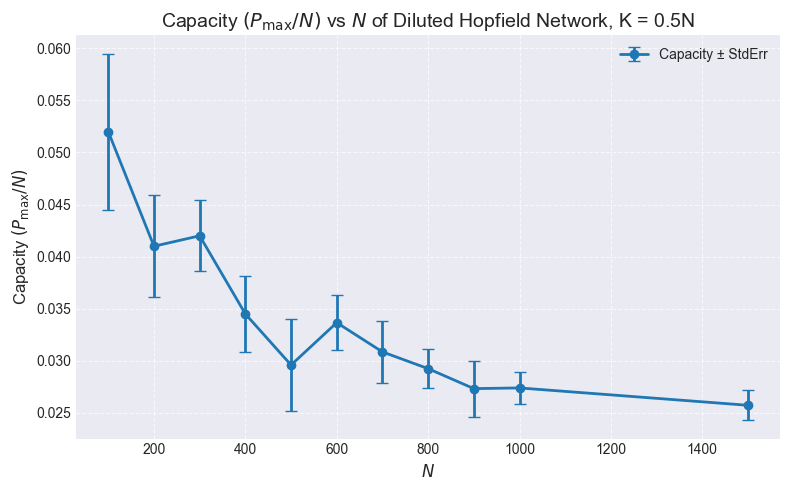

In [26]:
capacity_means = {N:np.mean(fractions)/N for N,fractions in max_P_ex2.items()}
capacity_sterrs = {N:np.std([f/N for f in fractions]) for N,fractions in max_P_ex2.items()}
sorted_N = sorted(capacity_means.keys())
means = [capacity_means[N] for N in sorted_N]
sterrs = [capacity_sterrs[N] for N in sorted_N]
title = r'Capacity $(P_{\mathrm{max}}/N)$ vs $N$ of Diluted Hopfield Network, K = 0.5N'
xlabel = r'$N$'
ylabel = r'Capacity $(P_{\mathrm{max}}/N)$'
plot_capacity(sorted_N, means, sterrs, title,xlabel, ylabel)

### 2.3

In [30]:
N = 600  # Number of neurons
T = 30   # Number of update steps
P_values = [15, 20]  # Number of patterns
nflips_range = np.arange(0, 301, 30)
repeats = 5  # Repeat for averaging

In [28]:
fractions_retrieved = {P: [] for P in P_values}
errors = {P: [] for P in P_values}

for P in P_values:
    for N_flipped in nflips_range:
        success_counts = []
        for _ in range(repeats):
            network = HopfieldNetwork(N, P, int(N/2))
            success_count = 0
            for mu in range(P):
                start_state = network.patterns[mu].copy()
                flip_indices = random.sample(range(N), N_flipped)
                start_state[flip_indices] *= -1
                network.set_states(start_state)
                network.compute_overlap(return_none=True)
                
                for step in range(T):
                    network.compute_next_state_sparse()
                final_state = network.states
                if np.array_equal(final_state, network.patterns[mu]):
                    success_count += 1

            success_fraction = success_count / P
            success_counts.append(success_fraction)

        mean = np.mean(success_counts)
        stderr = np.std(success_counts) / np.sqrt(repeats)
        fractions_retrieved[P].append(mean)
        errors[P].append(stderr)

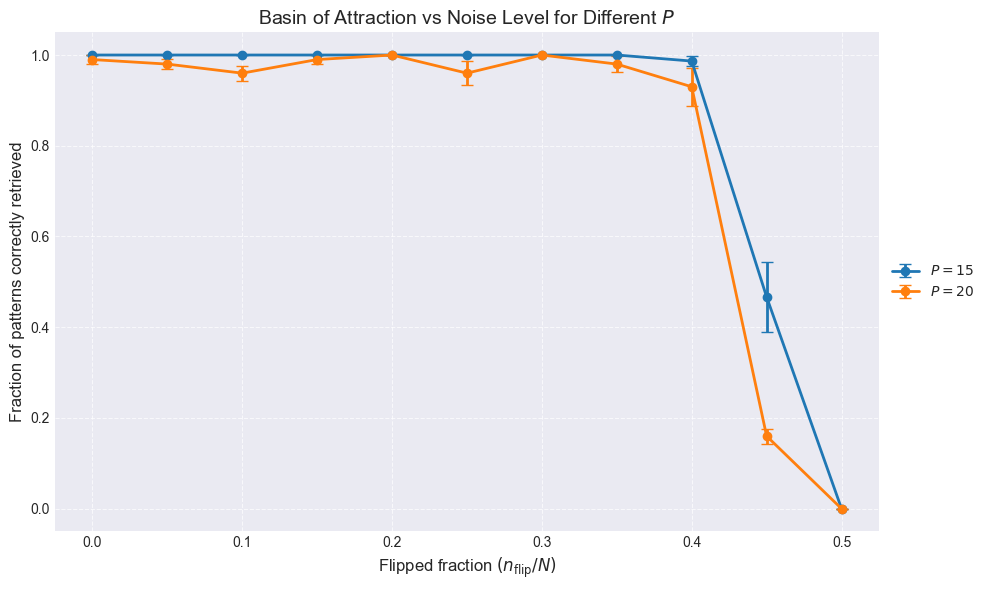

In [35]:
plot_basin_of_attraction(P_values, nflips_range, fractions_retrieved, errors,N)

# Exercise 3

In [36]:
N = 1000  # Number of neurons
T = 50   # Number of update steps
P = 5  # Number of patterns
betas = (1.5, 2.5, 3.5)

2.0


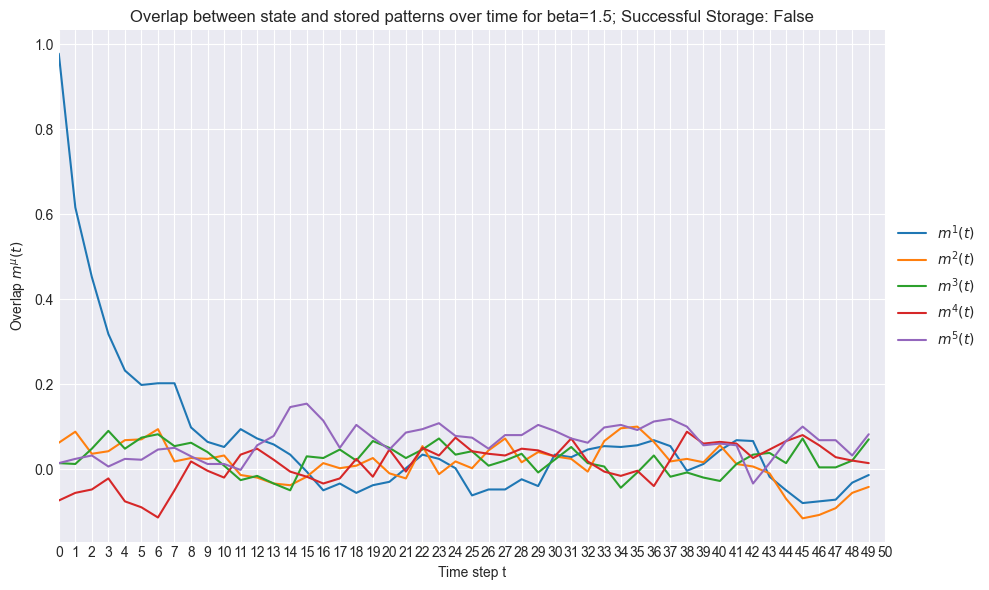

2.0


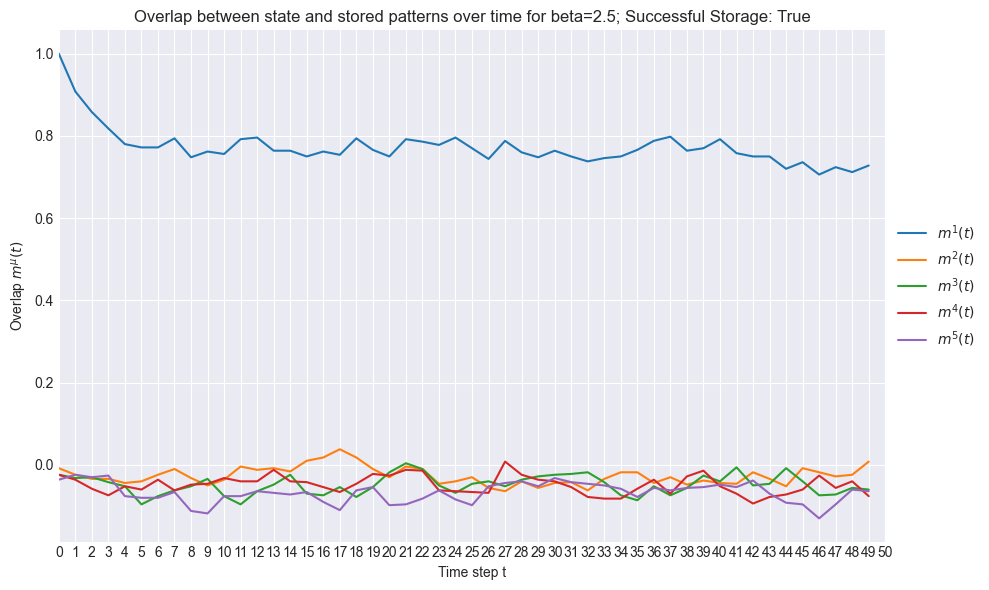

2.0


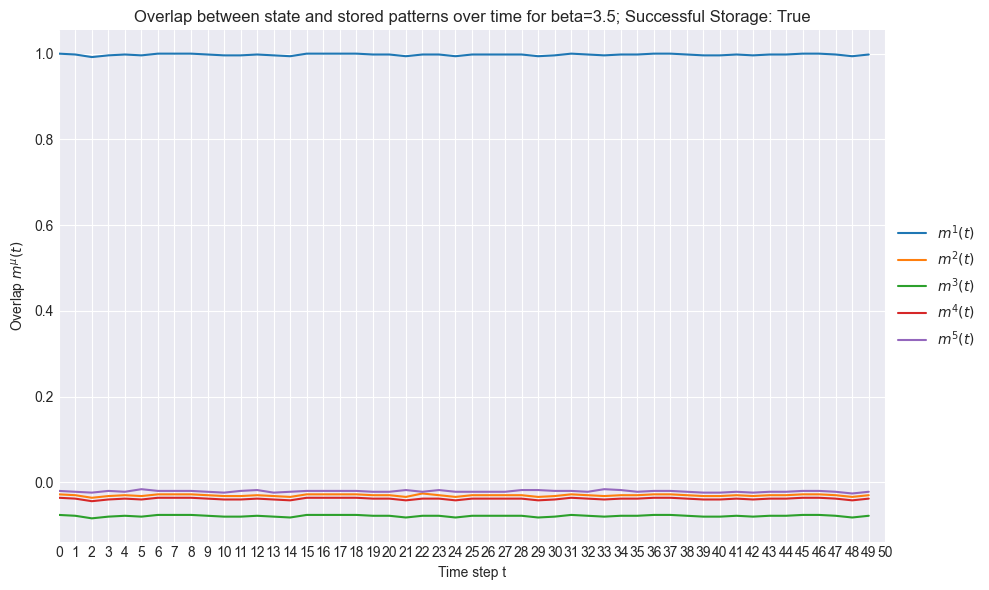

In [37]:
for beta in betas:
    network = HopfieldNetwork(N,P)
    #Setting inital state as the first pattern
    start_state = network.patterns[0].copy()
    network.set_states(start_state)

    network.compute_overlap(ex3=True)
    print(network.overlaps[0])
    overlaps = np.zeros((T,P))

    for step in range(T):
        network.compute_next_state_ex3(beta)
        overlaps[step, :] = network.overlaps

    is_stored = not np.argmax(np.mean(overlaps[-10:,:], axis=0))
    plot_overlaps(overlaps, T, title=f"Overlap between state and stored patterns over time for beta={beta}; Successful Storage: {is_stored}")


### Ex3.2

In [38]:
repeats = 5  # Repeat for averaging

N = 1000  # Number of neurons
T = 50   # Number of update steps

betas = (1, 1.5, 2, 2.5, 3, 3.5)

In [39]:
def check_within_capacity(overlaps, p):
    """
    As per definition in Note 2, a pattern is stored properly if the average of the last 10 overlaps is at maximum for the first pattern
    """
    
    # if the argmax == p, then the pattern is stored properly
    return not np.argmax(np.mean(overlaps[-10:,:], axis=0)) - p

In [40]:
max_P = {beta: [] for beta in betas}

for r in range(repeats):
    for beta in betas:
        P = 0
        retrieve = True

        while retrieve:
            P += 1
            network = HopfieldNetwork(N, P)

            success = True 

            for p in range(P):
                start_state = network.patterns[p].copy()
                start_state[start_state == -1] = 0
                network.set_states(start_state)
                network.compute_overlap(ex3=True)

                overlaps = np.zeros((T, P))

                for step in range(T):
                    new_state = network.compute_next_state_ex3(beta)
                    overlaps[step, :] = network.overlaps

                if not check_within_capacity(overlaps, p):
                    retrieve = False
                    success = False
                    print(f"Pattern {p} not stored properly for Beta {beta} at repeat {r}, on to the next...")
                    break

            if not success:
                break

        print(f"Completed repeat {r}, Beta {beta}: capacity = {P-1}")
        max_P[beta].append(P - 1)


Pattern 1 not stored properly for Beta 1 at repeat 0, on to the next...
Completed repeat 0, Beta 1: capacity = 1
Pattern 0 not stored properly for Beta 1.5 at repeat 0, on to the next...
Completed repeat 0, Beta 1.5: capacity = 1
Pattern 0 not stored properly for Beta 2 at repeat 0, on to the next...
Completed repeat 0, Beta 2: capacity = 2
Pattern 3 not stored properly for Beta 2.5 at repeat 0, on to the next...
Completed repeat 0, Beta 2.5: capacity = 11
Pattern 4 not stored properly for Beta 3 at repeat 0, on to the next...
Completed repeat 0, Beta 3: capacity = 33
Pattern 15 not stored properly for Beta 3.5 at repeat 0, on to the next...
Completed repeat 0, Beta 3.5: capacity = 64
Pattern 0 not stored properly for Beta 1 at repeat 1, on to the next...
Completed repeat 1, Beta 1: capacity = 1
Pattern 2 not stored properly for Beta 1.5 at repeat 1, on to the next...
Completed repeat 1, Beta 1.5: capacity = 2
Pattern 0 not stored properly for Beta 2 at repeat 1, on to the next...
Comp

In [41]:
capacity_means = {beta:np.mean(fractions)/N for beta,fractions in max_P.items()}
capacity_sterrs = {beta:np.std([f/N for f in fractions]) for beta,fractions in max_P.items()}

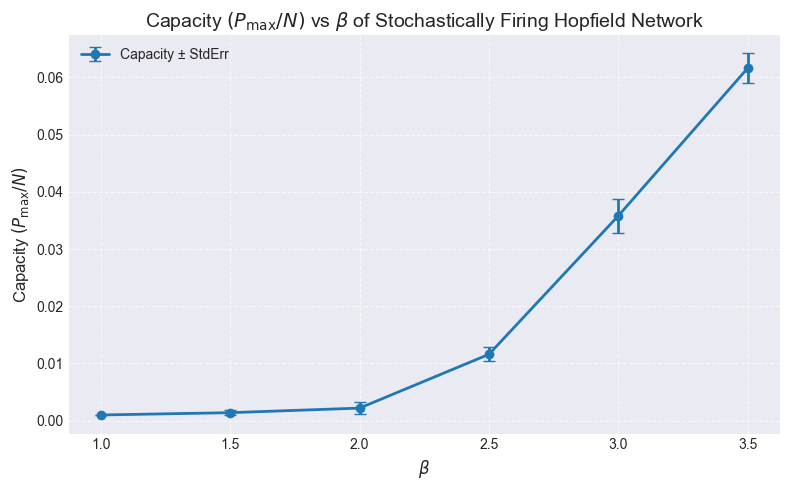

In [42]:
sorted_N = sorted(capacity_means.keys())
means = [capacity_means[N] for N in sorted_N]
sterrs = [capacity_sterrs[N] for N in sorted_N]
title = r'Capacity $(P_{\mathrm{max}}/N)$ vs $\beta$ of Stochastically Firing Hopfield Network'
xlabel = r'$\beta$'
ylabel = r'Capacity $(P_{\mathrm{max}}/N)$'
plot_capacity(sorted_N, means, sterrs, title, xlabel, ylabel)


### 3.4

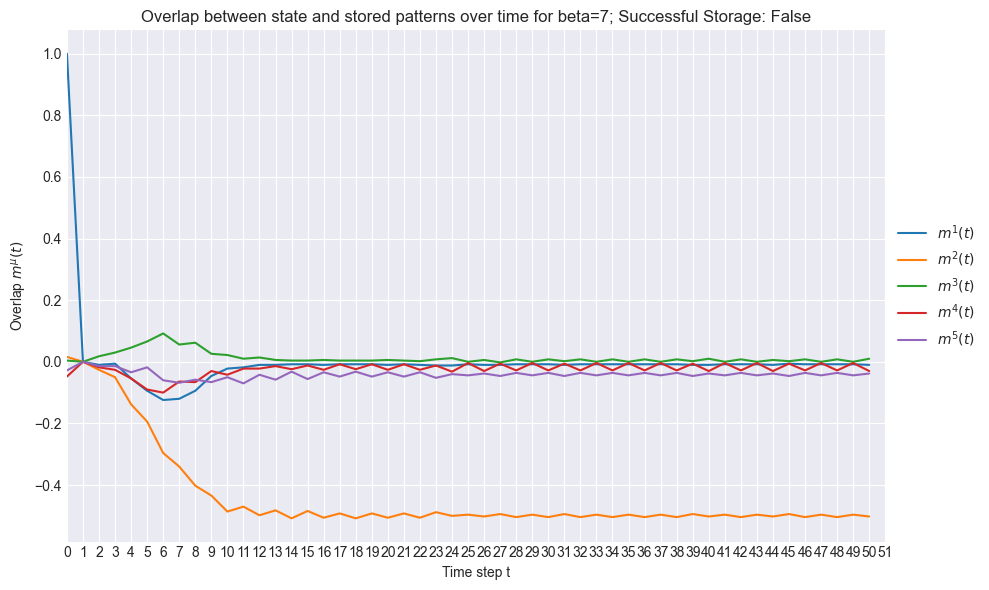

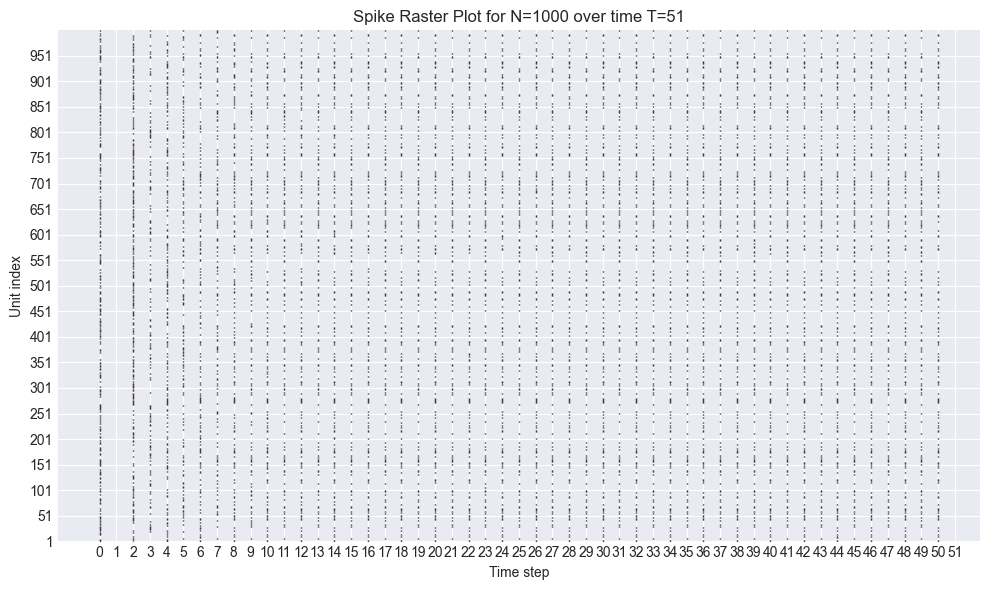

In [43]:
N = 1000
P = 5
beta = 7
T = 50

network = HopfieldNetwork(N,P)

start_state = network.patterns[0].copy()
start_state[start_state == -1] = 0
network.set_states(start_state)

network.compute_overlap(ex3=True)

overlaps = np.zeros((T+1,P))
states_per_t = np.zeros((T+1, N))
states_per_t[0, :] = start_state.copy()
overlaps[0, :] = network.overlaps.copy()
for step in range(T):
    network.compute_next_state_ex3(beta, implement_refractory=True)
    overlaps[step+1, :] = network.overlaps
    states_per_t[step+1, :] = network.states

is_stored = not np.argmax(np.mean(overlaps[-10:,:], axis=0))
plot_overlaps(
    overlaps,
    T+1,
    title=
    f"Overlap between state and stored patterns over time for beta={beta}; Successful Storage: {is_stored}"
)
plot_raster(states_per_t)

### 3.5

True
0.492


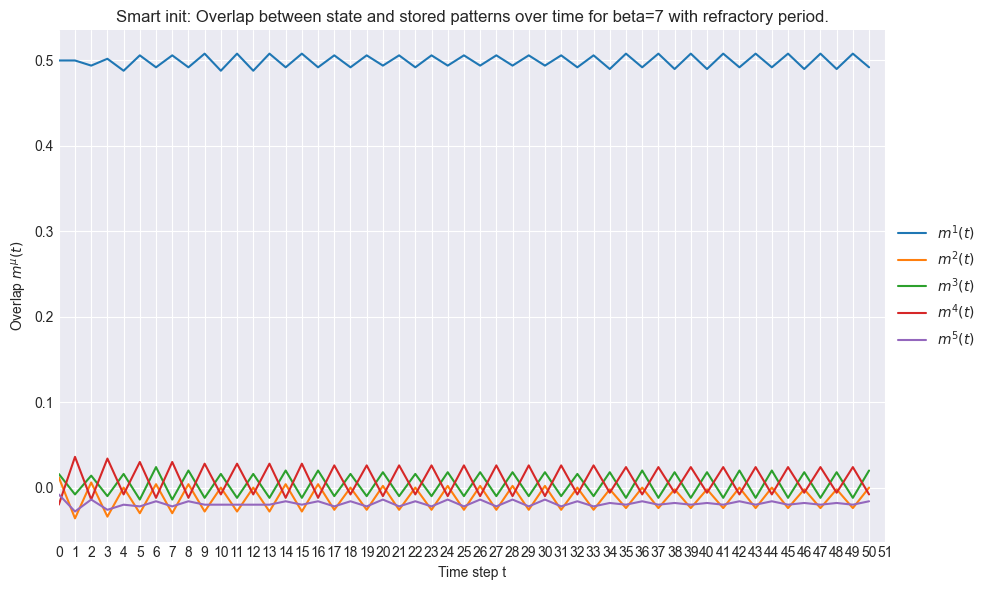

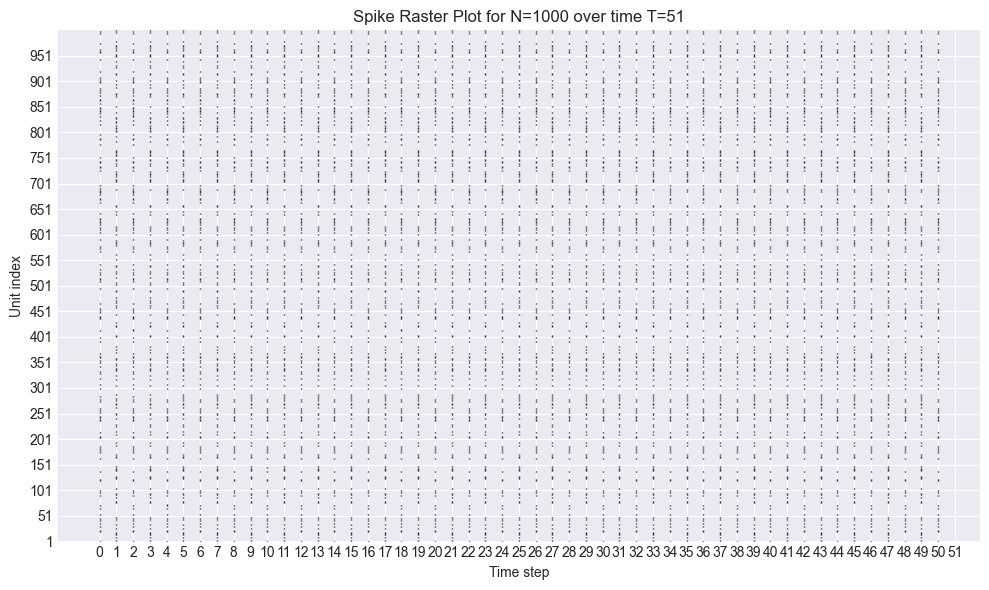

In [44]:
N = 1000
P = 5
beta = 7
T = 50

network = HopfieldNetwork(N,P)
start_state = network.patterns[0].copy()
start_state[start_state == -1] = 0

ones_indices = np.where(start_state == 1)[0]

#choosing 50% of the ones to flip
num_to_flip = len(ones_indices)//2
indices_to_flip = np.random.choice(ones_indices, size=num_to_flip, replace=False)

start_state[indices_to_flip] = 0

network.set_states(start_state)
states_per_t = np.zeros((T+1, N))
states_per_t[0, :] = start_state.copy()

network.compute_overlap(ex3=True)
overlaps = np.zeros((T+1,P))
overlaps[0, :] = network.overlaps
for step in range(T):
    network.compute_next_state_ex3(beta, implement_refractory=True)
    overlaps[step+1, :] = network.overlaps
    states_per_t[step+1, :] = network.states

is_stored = not np.argmax(np.mean(overlaps[-10:,:], axis=0))
print(is_stored)
print(overlaps[-1,0])
plot_overlaps(overlaps, T+1, title=f"Smart init: Overlap between state and stored patterns over time for beta={beta} with refractory period.")
plot_raster(states_per_t)

### 3.6

False
0.022


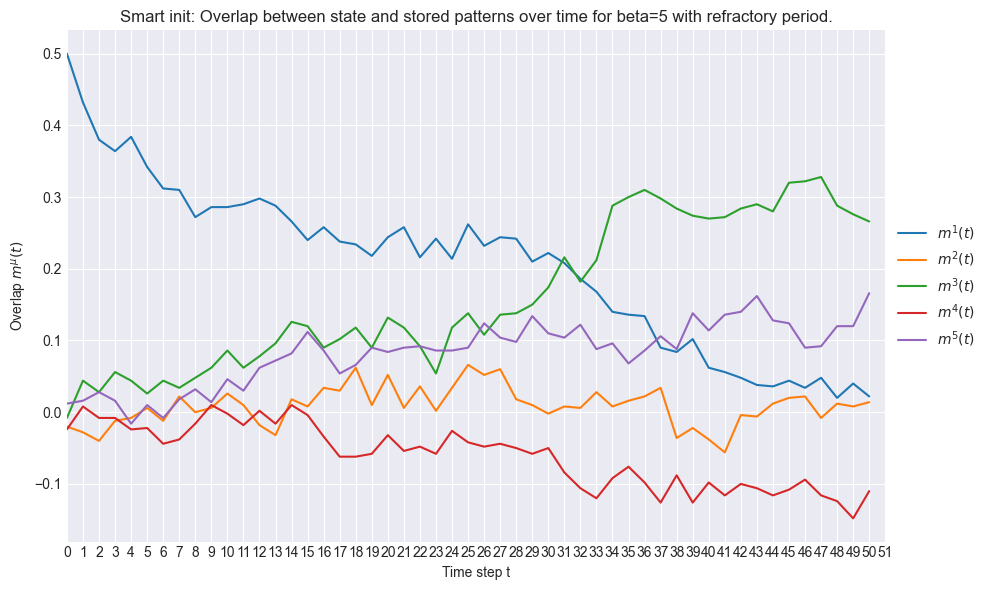

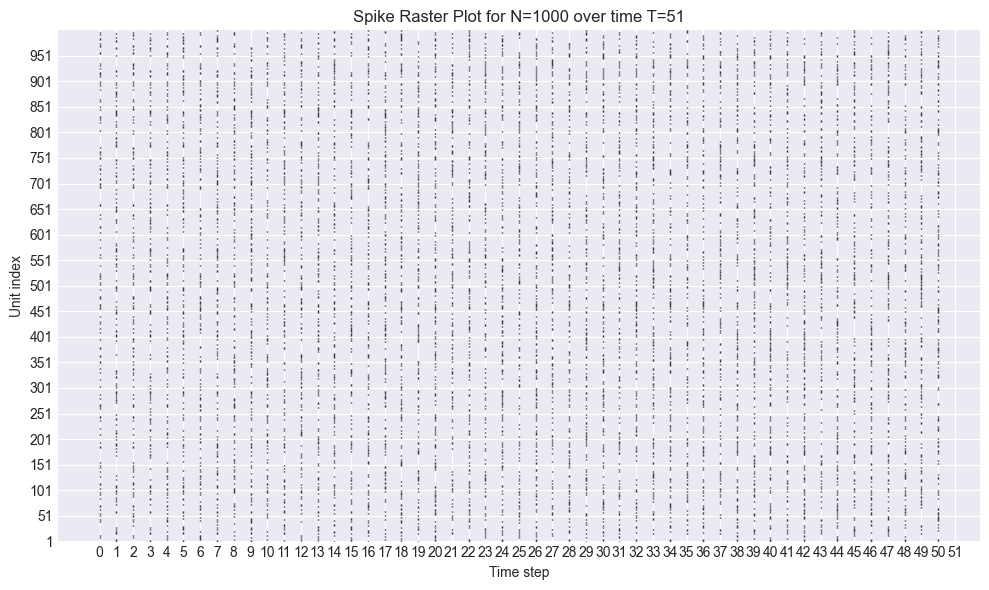

In [45]:
N = 1000
P = 5
beta = 5
T = 50

network = HopfieldNetwork(N,P)
start_state = network.patterns[0].copy()
start_state[start_state == -1] = 0

ones_indices = np.where(start_state == 1)[0]

#choosing 50% of the ones to flip
num_to_flip = len(ones_indices)//2
indices_to_flip = np.random.choice(ones_indices, size=num_to_flip, replace=False)

start_state[indices_to_flip] = 0

network.set_states(start_state)
states_per_t = np.zeros((T+1, N))
states_per_t[0, :] = start_state.copy()

network.compute_overlap(ex3=True)
overlaps = np.zeros((T+1,P))
overlaps[0, :] = network.overlaps
for step in range(T):
    network.compute_next_state_ex3(beta, implement_refractory=True)
    overlaps[step+1, :] = network.overlaps
    states_per_t[step+1, :] = network.states

is_stored = not np.argmax(np.mean(overlaps[-10:,:], axis=0))
print(is_stored)
print(overlaps[-1,0])
plot_overlaps(
    overlaps,
    T + 1,
    title=
    f"Smart init: Overlap between state and stored patterns over time for beta={beta} with refractory period."
)
plot_raster(states_per_t)   

### 3.7

In [ ]:
repeats = 5  # Repeat for averaging

N = 1000  # Number of neurons
T = 50   # Number of update steps

betas = (2.0, 3.0, 4.0, 5.0, 6.0, 7.0)

In [ ]:
max_P = {beta: [] for beta in betas}

for r in range(repeats):
    for beta in betas:
        P = 0
        retrieve = True

        while retrieve:
            P += 1
            network = HopfieldNetwork(N, P)

            success = True

            for p in range(P):
                start_state = network.patterns[p].copy()
                start_state[start_state == -1] = 0
                ones_indices = np.where(start_state == 1)[0]

                #choosing 50% of the ones to flip
                num_to_flip = len(ones_indices)//2
                indices_to_flip = np.random.choice(ones_indices, size=num_to_flip, replace=False)

                start_state[indices_to_flip] = 0
                network.set_states(start_state)
                network.compute_overlap(ex3=True)

                overlaps = np.zeros((T, P))

                for step in range(T):
                    new_state = network.compute_next_state_ex3(beta, implement_refractory=True)
                    overlaps[step, :] = network.overlaps

                if not check_within_capacity(overlaps, p):
                    retrieve = False
                    success = False
                    print(f"Pattern {p} not stored properly for Beta {beta} at repeat {r}, on to the next...")
                    break

            if not success:
                break

        print(f"Completed repeat {r}, Beta {beta}: capacity = {P-1}")
        max_P[beta].append(P - 1)


In [ ]:
capacity_means = {beta:np.mean(fractions)/N for beta,fractions in max_P.items()}
capacity_sterrs = {beta:np.std([f/N for f in fractions]) for beta,fractions in max_P.items()}

In [ ]:
sorted_N = sorted(capacity_means.keys())
means = [capacity_means[N] for N in sorted_N]
sterrs = [capacity_sterrs[N] for N in sorted_N]
title = r'Capacity $(P_{\mathrm{max}}/N)$ vs $\beta$ of Stochastically Firing Hopfield Network'
xlabel = r'$\beta$'
ylabel = r'Capacity $(P_{\mathrm{max}}/N)$'
plot_capacity(sorted_N, means, sterrs, title, xlabel, ylabel)